<a href="https://colab.research.google.com/github/LuchoBrown/APIMatbaRofex/blob/main/API_MATBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

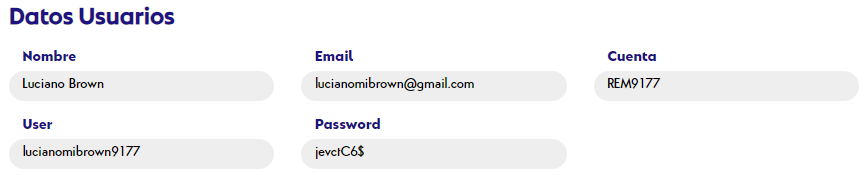


¿Que son los headers?
Las cabeceras (en inglés headers) HTTP permiten al cliente y al servidor enviar información adicional junto a una petición o respuesta. Una cabecera de petición esta compuesta por su nombre (no sensible a las mayusculas) seguido de dos puntos ':', y a continuación su valor (sin saltos de línea). Los espacios en blanco a la izquierda del valor son ignorados Se pueden agregar cabeceras propietarias personalizadas usando el prefijo 'X-',

In [2]:
#Headers

import requests
url = 'https://api.remarkets.primary.com.ar/auth/getToken'

resp = requests.post(url, headers={"X-Username": "lucianomibrown9177", "X-Password": "jevctC6$"})
resp

<Response [200]>

In [3]:
#Buscamos el token de acceso
token = resp.headers ['X-Auth-Token']


In [4]:
# Definimos una funcion para obtener el token de Primary

#Importamos requests
import requests as rq
# Definimos la funcion
def GetToken (username, password):
  return rq.post(url, headers = {"X-Username": "lucianomibrown9177", "X-Password": "jevctC6$"}).headers["X-Auth-Token"]
#Requests.post es un metodo para "informar" datos al endopoint. En este caso, los datos de usuario y contraseña


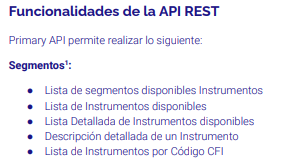

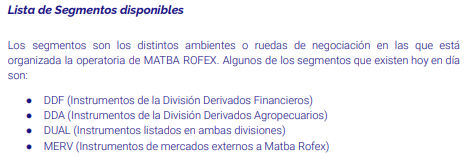

In [ ]:
# Obtenemos segmentos

import pandas as pd
import requests as rq

#Creamos una funcion para obtener los segmentos

def getSegment():
  url = "https://api.remarkets.primary.com.ar/rest/segment/all"
  r = rq.get(url, headers={"X-Auth-Token":token})
  r = r.json ()
  rDF = pd.DataFrame(r)
  status = pd.DataFrame.from_dict(dict(rDF["status"]), orient = "index")
  segments = pd.DataFrame.from_dict(dict(rDF["segments"]), orient = "index")
  resp = pd.concat([status, segments], axis = 1)
  resp.columns = ["status", "marketsegmentId", "marketId"]
  return resp
segments = getSegment ()
segments

In [6]:
#Creamos una funcion para obtener los instrumentos

def getInstrument():
  url = "https://api.remarkets.primary.com.ar/rest/instruments/all"
  r = rq.get(url, headers={"X-Auth-Token":token})
  r = r.json ()
  #Creamos DF madre
  df = pd.DataFrame(r["instruments"])
  codes = df["cficode"]
  instruments = pd.DataFrame.from_dict(dict(df["instrumentId"]), orient = "index")

  #Concateno ambas cosas y renombro columnas
  resp = pd.concat([codes, instruments], axis = 1)
  resp.columns = ["cficode", "marketId", "symbol"]
  #instruments.groupby("cficode").symbol.count()
  return resp

instruments = getInstrument()
instruments.groupby("cficode").symbol.count()
instruments


,cficode,marketId,symbol
0,OCAFXS,ROFX,TRI.ROS/DIC23 352 C
1,ESXXXX,ROFX,MERV - XMEV - AGRO - 48hs
2,OCAFXS,ROFX,TRI.ROS/MAR24 290 C
3,OPAFXS,ROFX,TRI.ROS/MAR24 226 P
4,OCAFXS,ROFX,SOY.CME/ABR24 470 C
...,...,...,...
820,FXXXSX,ROFX,DLR/JUL24
821,OCAFXS,ROFX,SOJ.ROS/JUL24 348 C
822,EMXXXX,ROFX,MERV - XMEV - DIA - CI
823,OPAFXS,ROFX,TRI.ROS/DIC23 172 P


In [7]:
#OBTENEMOS INSTRUMENTOS POR CFICODE

#Utilizando la funcion getinstruments podemos contabilizar la cantidad de instrumentos por CFI_CODE con un sencillo agrupamiento:

instruments = getInstrument()
instruments.groupby("cficode").symbol.count()
instruments



,cficode,marketId,symbol
0,OCAFXS,ROFX,TRI.ROS/DIC23 352 C
1,ESXXXX,ROFX,MERV - XMEV - AGRO - 48hs
2,OCAFXS,ROFX,TRI.ROS/MAR24 290 C
3,OPAFXS,ROFX,TRI.ROS/MAR24 226 P
4,OCAFXS,ROFX,SOY.CME/ABR24 470 C
...,...,...,...
820,FXXXSX,ROFX,DLR/JUL24
821,OCAFXS,ROFX,SOJ.ROS/JUL24 348 C
822,EMXXXX,ROFX,MERV - XMEV - DIA - CI
823,OPAFXS,ROFX,TRI.ROS/DIC23 172 P


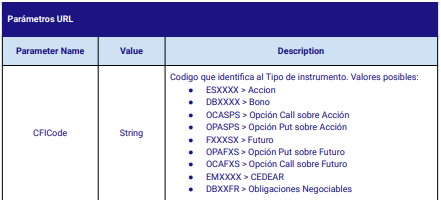